In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_excel("Online Retail.xlsx")

In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
uniq_customer_data=data[['Country','CustomerID']].drop_duplicates()

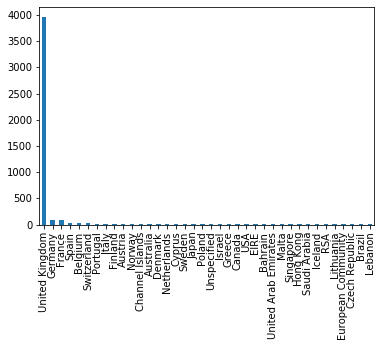

In [7]:
uniq_customer_data.Country.value_counts().plot(kind='bar')

In [8]:
Unique_Invoices=len(data['InvoiceNo'].value_counts())
Unique_Customer=len(data['CustomerID'].value_counts())

print("Unique Invoices in the dataset : ",Unique_Invoices)
print("\nUnique Customers in the dataset : ",Unique_Customer)

Unique Invoices in the dataset :  25900

Unique Customers in the dataset :  4372


In [9]:
cancelled_order=data['InvoiceNo'].apply(lambda invoice: int('C' in str(invoice)))
data['Cancelled']=cancelled_order

In [10]:
data_preprocess=data.copy()

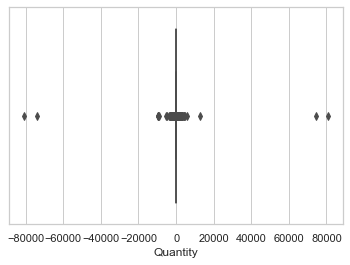

In [11]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data_preprocess["Quantity"])

In [12]:
data_preprocess['Cancelled'].value_counts()

0    532621
1      9288
Name: Cancelled, dtype: int64

In [13]:
data_preprocess=data_preprocess.dropna(subset=['CustomerID'])

In [14]:
data_preprocess=data_preprocess[data_preprocess.Country=='United Kingdom']
data_preprocess=data_preprocess[data_preprocess.Cancelled==0]

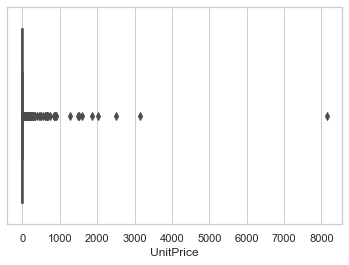

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data_preprocess["UnitPrice"])

In [16]:
data_preprocess=data_preprocess[data_preprocess['Quantity']>0]
data_preprocess=data_preprocess[data_preprocess['UnitPrice']>0]

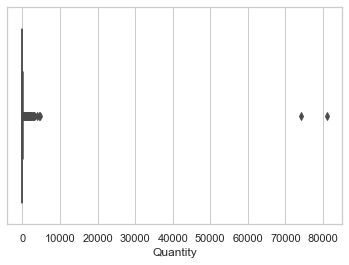

In [17]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data_preprocess["Quantity"])

In [18]:
Q1 = data_preprocess.Quantity.quantile(0.25)
Q3 = data_preprocess.Quantity.quantile(0.75)
IQR= Q3 - Q1

In [19]:
IQR

10.0

In [20]:
data_preprocess = data_preprocess[~((data_preprocess['Quantity'] < (Q1 - 1.5*IQR)) | (data_preprocess['Quantity'] > (Q3 + 1.5*IQR)))]
data_preprocess

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,0


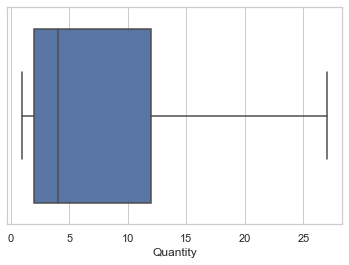

In [21]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data_preprocess["Quantity"])

In [22]:
data_preprocess=data_preprocess[['InvoiceNo','CustomerID','InvoiceDate','Quantity','UnitPrice']]

In [23]:
TotalPrice=data_preprocess['Quantity'] * data_preprocess['UnitPrice']

In [24]:
data_preprocess.loc[:,('TotalPrice')]=TotalPrice

C:\Users\kamal\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kamal\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [25]:
data_preprocess['InvoiceDate']=pd.to_datetime(data_preprocess['InvoiceDate']).dt.date

C:\Users\kamal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
data_preprocess.head()

,InvoiceNo,CustomerID,InvoiceDate,Quantity,UnitPrice,TotalPrice
0,536365,17850.0,2010-12-01,6,2.55,15.30
1,536365,17850.0,2010-12-01,6,3.39,20.34
2,536365,17850.0,2010-12-01,8,2.75,22.00
3,536365,17850.0,2010-12-01,6,3.39,20.34
4,536365,17850.0,2010-12-01,6,3.39,20.34


In [27]:
#We have taken 10/12/2011 as referrance date instead of 09/12/2011 so that we cannot get '0' difference and so there won't be any problem by taking log of those values
ref_date=dt.date(2011,12,10)

In [28]:
data_rfm=data_preprocess.groupby('CustomerID').agg({'InvoiceDate': lambda date: (ref_date - date.max()).days,
                                                    'InvoiceNo': pd.Series.nunique,
                                                    'TotalPrice': lambda price: price.sum()})

In [29]:
data_rfm.columns=['Recency','Frequency','Monetary']

In [30]:
data_rfm.describe()

,Recency,Frequency,Monetary
count,3825.000000,3825.000000,3825.000000
mean,92.665098,4.051503,1169.564477
std,99.286524,6.662454,2240.842468
min,1.000000,1.000000,1.900000
25%,18.000000,1.000000,243.220000
50%,51.000000,2.000000,551.950000
75%,145.000000,4.000000,1293.350000
max,374.000000,203.000000,61295.620000


In [31]:
data_rfm['R_Score'] = pd.qcut(data_rfm['Recency'], 5, labels =[5,4,3,2,1])

data_rfm.loc[( data_rfm['Frequency'] >= 0) & (data_rfm['Frequency'] <= 2), 'F_Score']= int(1)
data_rfm.loc[( data_rfm['Frequency'] > 2) & (data_rfm['Frequency'] <= 6), 'F_Score']= int(2)
data_rfm.loc[( data_rfm['Frequency'] > 6) & (data_rfm['Frequency'] <= 10), 'F_Score']= int(3)
data_rfm.loc[( data_rfm['Frequency'] > 10) & (data_rfm['Frequency'] <= 20), 'F_Score']= int(4)
data_rfm.loc[( data_rfm['Frequency'] > 20), 'F_Score']= int(5)

data_rfm['M_Score'] = pd.qcut(data_rfm['Monetary'], 5, labels =[1,2,3,4,5])

In [32]:
data_rfm['F_Score']=data_rfm['F_Score'].astype('category')

In [33]:
data_rfm.dtypes

Recency         int64
Frequency       int64
Monetary      float64
R_Score      category
F_Score      category
M_Score      category
dtype: object

In [34]:
data_rfm['RFM_Cell'] = data_rfm.R_Score.astype(str) + data_rfm.F_Score.astype(str) + data_rfm.M_Score.astype(str)
data_rfm['RFM_Score'] = (data_rfm.R_Score.astype(int) + data_rfm.F_Score.astype(int) + data_rfm.M_Score.astype(int))/3



In [35]:
data_rfm['RFM_Score'].value_counts()

2.000000    464
1.333333    430
2.333333    403
1.666667    395
2.666667    374
3.333333    331
3.000000    325
1.000000    292
3.666667    273
4.000000    181
4.333333    170
4.666667    125
5.000000     62
Name: RFM_Score, dtype: int64

In [36]:
data_rfm.loc[( data_rfm['RFM_Score'] >= 4.33) & (data_rfm['RFM_Score'] <= 5), 'CustomerLabel']= "Loyal and Best Customer"
data_rfm.loc[( data_rfm['RFM_Score'] >= 3.33) & (data_rfm['RFM_Score'] <= 4 ), 'CustomerLabel']= "Promising Customer"
data_rfm.loc[( data_rfm['RFM_Score'] >= 2.33) & (data_rfm['RFM_Score'] <= 3), 'CustomerLabel']= "Average Customer"
data_rfm.loc[( data_rfm['RFM_Score'] >=1.33) & (data_rfm['RFM_Score'] <= 2), 'CustomerLabel']= "Customer at Risk"
data_rfm.loc[( data_rfm['RFM_Score'] == 1), 'CustomerLabel'] = "Very rare Customer"


In [37]:
data_rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Cell,RFM_Score,CustomerLabel
CustomerID,,,,,,,,,
12747.0,3,11,3073.41,5,4.0,5,54.05,4.666667,Loyal and Best Customer
12748.0,1,203,26279.22,5,5.0,5,55.05,5.000000,Loyal and Best Customer
12749.0,4,5,4032.98,5,2.0,5,52.05,4.000000,Promising Customer
12820.0,4,4,923.62,5,2.0,4,52.04,3.666667,Promising Customer
12821.0,215,1,92.72,1,1.0,1,11.01,1.000000,Very rare Customer
...,...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,1.0,1,11.01,1.000000,Very rare Customer
18281.0,181,1,80.82,1,1.0,1,11.01,1.000000,Very rare Customer
18282.0,8,2,164.13,5,1.0,1,51.01,2.333333,Average Customer


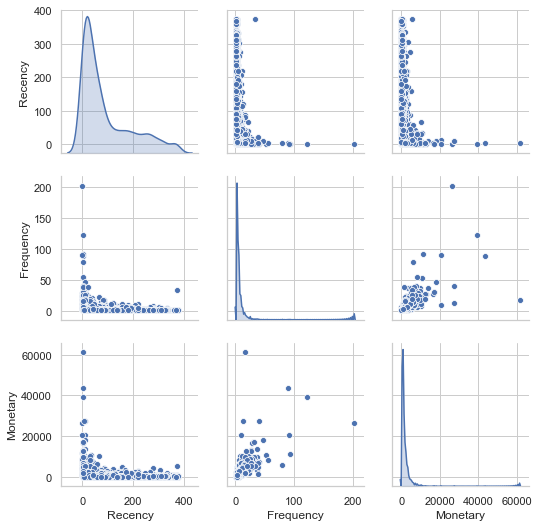

In [38]:
RFM = data_rfm[['Recency','Frequency','Monetary']].copy()
sns.pairplot(RFM,diag_kind="kde")


In [39]:
RFMlog = np.log(RFM)
RFMlog.columns=['Recencylog','Frequencylog','Monetarylog']

In [40]:
RFMlog

,Recencylog,Frequencylog,Monetarylog
CustomerID,,,
12747.0,1.098612,2.397895,8.030543
12748.0,0.000000,5.313206,10.176534
12749.0,1.386294,1.609438,8.302261
12820.0,1.386294,1.386294,6.828301
12821.0,5.370638,0.000000,4.529584
...,...,...,...
18280.0,5.627621,0.000000,5.196285
18281.0,5.198497,0.000000,4.392224
18282.0,2.079442,0.693147,5.100659


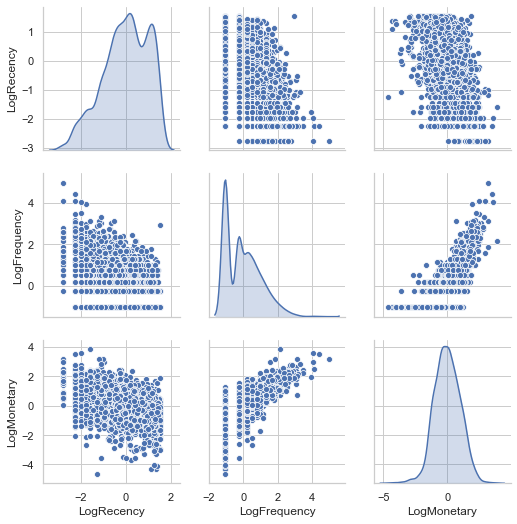

In [41]:
from sklearn.preprocessing import StandardScaler
RFM_s = StandardScaler().fit_transform(RFMlog)
RFM_s = pd.DataFrame(RFM_s,index=data_rfm.index)
RFM_s.columns=['LogRecency','LogFrequency','LogMonetary']
sns.pairplot(RFM_s,diag_kind="kde")


In [42]:
RFM_s=pd.concat([RFM_s,data_rfm],axis=1)

In [43]:
RFM_s

,LogRecency,LogFrequency,LogMonetary,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Cell,RFM_Score,CustomerLabel
CustomerID,,,,,,,,,,,,
12747.0,-1.966248,1.669961,1.393951,3,11,3073.41,5,4.0,5,54.05,4.666667,Loyal and Best Customer
12748.0,-2.765079,4.974012,3.145233,1,203,26279.22,5,5.0,5,55.05,5.000000,Loyal and Best Customer
12749.0,-1.757066,0.776367,1.615692,4,5,4032.98,5,2.0,5,52.05,4.000000,Promising Customer
12820.0,-1.757066,0.523469,0.412835,4,4,923.62,5,2.0,4,52.04,3.666667,Promising Customer
12821.0,1.140060,-1.047680,-1.463083,215,1,92.72,1,1.0,1,11.01,1.000000,Very rare Customer
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,1.326919,-1.047680,-0.919008,278,1,180.60,1,1.0,1,11.01,1.000000,Very rare Customer
18281.0,1.014892,-1.047680,-1.575179,181,1,80.82,1,1.0,1,11.01,1.000000,Very rare Customer
18282.0,-1.253060,-0.262106,-0.997045,8,2,164.13,5,1.0,1,51.01,2.333333,Average Customer


In [44]:
RFM_s['CustomerLabel'].value_counts()


Customer at Risk           1289
Average Customer           1102
Promising Customer          785
Loyal and Best Customer     357
Very rare Customer          292
Name: CustomerLabel, dtype: int64

In [45]:
data_RFM=RFM_s[['Recency','Frequency','Monetary']].copy()

In [46]:
import scipy as sp
err=[]
K = range(1,15)
for i in K:
    km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 100, random_state = 0)
    km = km.fit(data_RFM)
    err.append(km.inertia_)

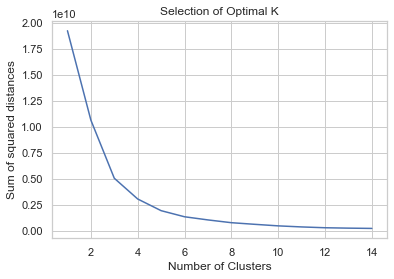

In [47]:
plt.plot(K, err)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances')
plt.title('Selection of Optimal K')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',n_init=40,random_state=0)

In [49]:
pred = kmeans.fit_predict(data_RFM)
RFM_s['Cluster']=pred

In [50]:
RFM_s['Cluster']=RFM_s['Cluster']+1

In [51]:
n_clusters = 5
RFM['Cluster']=RFM_s['Cluster']
cluster_stats = pd.DataFrame()

for i in range(1,n_clusters+1):
    mean = pd.DataFrame(RFM[RFM['Cluster'] ==i].mean())
    mini = pd.DataFrame(RFM[RFM['Cluster'] == i].min())
    maxi = pd.DataFrame(RFM[RFM['Cluster'] == i].max())
    median = pd.DataFrame(RFM[RFM['Cluster'] == i].median())
    cluster_stats = pd.concat([ mean, median, mini , maxi], axis=1)
    cluster_stats = cluster_stats.drop(index = 'Cluster')
    cluster_stats = cluster_stats.set_axis(["Mean", "Median", "Minimum","Maximum"], axis = 1, inplace = False)
    print("Cluster " + str(i))
    print(cluster_stats)
    print("\n")

Cluster 1
                  Mean    Median  Minimum  Maximum
Recency      33.792722    18.000     1.00    334.0
Frequency     8.145570     7.000     1.00     37.0
Monetary   2661.084748  2453.195  1588.04   4891.4


Cluster 2
                  Mean   Median  Minimum   Maximum
Recency      15.747967     8.00     1.00    373.00
Frequency    20.455285    18.00     4.00     93.00
Monetary   7159.418374  6505.29  4910.92  13833.57


Cluster 3
                   Mean    Median   Minimum   Maximum
Recency        3.333333      3.00      2.00      5.00
Frequency     76.333333     89.00     17.00    123.00
Monetary   47994.486667  43423.03  39264.81  61295.62


Cluster 4
                   Mean    Median   Minimum   Maximum
Recency        5.666667      3.00      1.00     12.00
Frequency     54.777778     31.00     10.00    203.00
Monetary   21215.942222  20507.58  16521.08  27597.28


Cluster 5
                 Mean   Median  Minimum  Maximum
Recency    108.269784   65.000      1.0   374.00
Freq

In [52]:
customer_ratio = (RFM['Cluster'].value_counts()/RFM['Cluster'].count())*100
customer_ratio = customer_ratio.to_frame()
customer_ratio['clusterNo'] = customer_ratio.index
customer_ratio = customer_ratio.rename(columns={"Cluster": "Customer Ratio"})
customer_ratio.reset_index(drop=True)

,Customer Ratio,clusterNo
0,79.947712,5
1,16.522876,1
2,3.215686,2
3,0.235294,4
4,0.078431,3


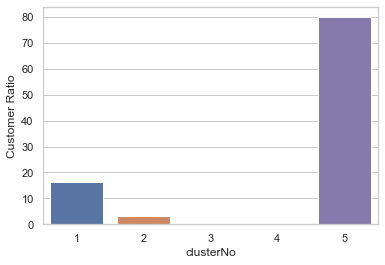

In [54]:
sns.barplot(x ='clusterNo',y='Customer Ratio', data= customer_ratio)